In [16]:
import numpy as np                 
import matplotlib.pyplot as plt    
import random                      

from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
import tensorflow as tf
import keras
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils                        

In [17]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


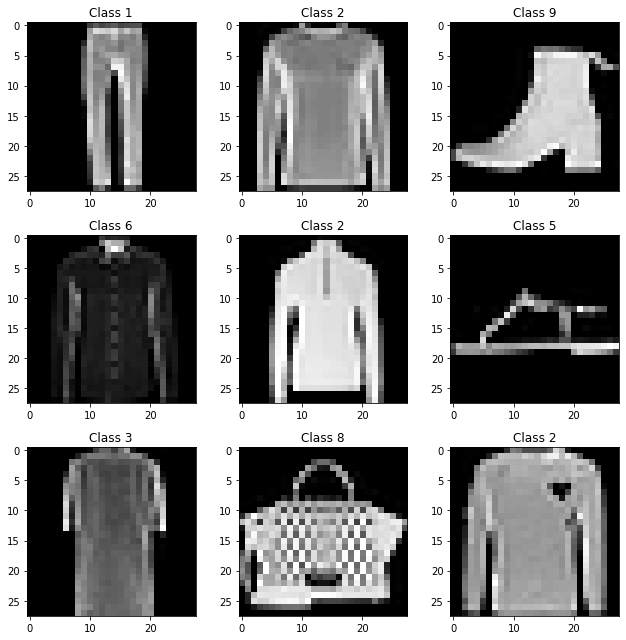

In [18]:
plt.rcParams['figure.figsize'] = (9,9) 

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [19]:
# X_train = X_train.reshape(60000, 784) 
# X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


In [20]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [21]:
# The Sequential model is a linear stack of layers and is very common.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=20, validation_split=0.2,
          verbose=1)

Epoch 1/20
375/375 [==============================] - 4s 10ms/step - loss: 1.0968 - accuracy: 0.5886 - val_loss: 0.4971 - val_accuracy: 0.8217
Epoch 2/20
375/375 [==============================] - 4s 9ms/step - loss: 0.6880 - accuracy: 0.7342 - val_loss: 0.4243 - val_accuracy: 0.8443
Epoch 3/20
375/375 [==============================] - 3s 9ms/step - loss: 0.6024 - accuracy: 0.7630 - val_loss: 0.3793 - val_accuracy: 0.8663
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 0.5536 - accuracy: 0.7866 - val_loss: 0.3563 - val_accuracy: 0.8755
Epoch 5/20
375/375 [==============================] - 4s 9ms/step - loss: 0.5109 - accuracy: 0.8034 - val_loss: 0.3220 - val_accuracy: 0.8885
Epoch 6/20
375/375 [==============================] - 3s 9ms/step - loss: 0.4868 - accuracy: 0.8135 - val_loss: 0.2981 - val_accuracy: 0.8938
Epoch 7/20
375/375 [==============================] - 4s 9ms/step - loss: 0.4628 - accuracy: 0.8236 - val_loss: 0.2871 - val_accuracy: 0.8979
Epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


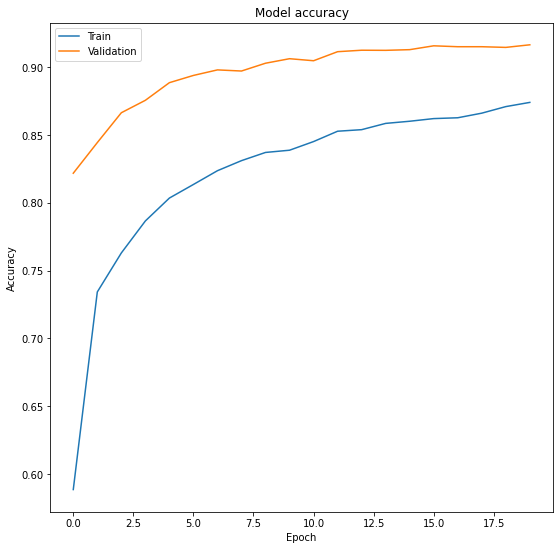

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()